## Problem 4

In [77]:
import numpy as np
from hw1_utils import load_images, load_labels
import matplotlib.pyplot as plt
%matplotlib inline  

train_X = load_images()
train_y = load_labels()

# we take out all the Xs that corresponded to a 1 or 6
X = train_X[(train_y==1)|(train_y==6),]
# we set 1 to be class 1 and 6 to be class 0
y = train_y[(train_y==1)|(train_y==6)]==1

# we generate a hyperplane that seperates 1 from 6, recycled from pset 2
nx = np.size(X,1)+1
ny = np.size(X,0)
X0 = np.hstack((X,-np.ones((ny,1))))
X0[~y,] = -X0[~y,]
w = np.zeros((nx))
y_est = np.squeeze(np.matmul(X0,w))>0
lpcnt = 0
while sum(y_est)<ny:
    lpcnt+=1
    i = 0
    while i<ny:
        y_est[i] = np.matmul(X0[i,],w)>0
        if y_est[i]<=0:
            w+=X0[i,]/np.linalg.norm(X0[i,])
        i+=1

In [172]:
# now implement projected gradient descent
X1 = np.hstack((X,-np.ones((ny,1))))
lr = 0.1
T = 1000; t = 0; 
x = np.zeros((nx,T+1))
v = np.zeros((nx,T+1))
x0 = np.squeeze(X1[-1,])
x[:,0] = x0
while np.matmul(x[:,t],w)<0 and t<T:
    v[:,t+1] = x[:,t]+lr*w
    x[:,t+1] = np.maximum(np.minimum(255*np.ones((nx)),v[:,t+1]),np.zeros((nx)))
    t+=1
print('Stopped after {} steps'.format(t))

Stopped after 265 steps


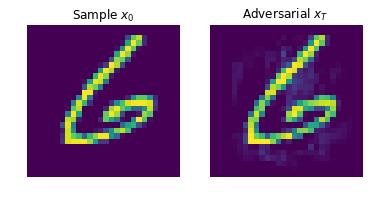

f_0 = -3646.56
f_T = 0.00


In [173]:
plt.subplot(1,2,1)
plt.imshow(np.reshape(x[:-1,0],[28,28]))
plt.axis('off')
plt.title(r'Sample $x_0$')
plt.subplot(1,2,2)
plt.imshow(np.reshape(x[:-1,t],[28,28]))
plt.axis('off')
plt.title(r'Adversarial $x_T$')
plt.show()
print(r'f_0 = {:.2f}'.format(np.matmul(x[:,0],w)))
print(r'f_T = {:.2f}'.format(np.matmul(x[:,-1],w)))

## Problem 5

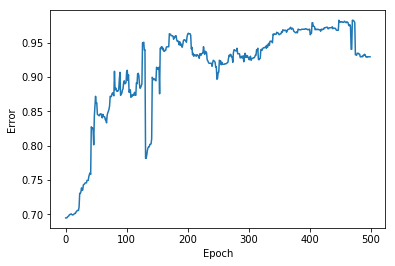

In [195]:
# load the banknote data into a pandas dataframe
import pandas as pd
fname = r'banknote.data.txt'
bnote = pd.read_csv(fname,header=None)

X = bnote.iloc[:,:-1]
y = 2*bnote.iloc[:,-1]-1

nx = np.size(X,1)+1
ny = np.size(X,0)
X0 = np.hstack((X,-np.ones((ny,1))))
X0[y<0,] = -X0[y<0,]
w = np.zeros((nx))
tol = 1e-10
t = 1
i = 0
mu = 1.001
T = 500
acchist = np.zeros((T))
while ny/t>tol and i<T:
    w+= -t
    for j in range(ny):
        w+= -X0[j,:].T/(np.squeeze(np.matmul(X0[j,:],w))-1)
    y_est = np.squeeze(np.matmul(X0,w))>0
    acchist[i] = sum(y_est)/ny
    t*=mu
    i+=1
plt.plot(acchist)
#plt.ylim((0.95,1))
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()